#  MACHINE LEARNING API PROJECT

#### Business Understanding (Stakeholders input)

### Hypotheses
***Null Hypothesis (H0)***: There is no correlation between Monthly Charges and Churn.

***Alternative Hypothesis (H1)***: Customers with higher Monthly Charges have a significantly higher churn rate.

### Analytical Questions
1. 
2. 
3. 
4. 
5. 


#### Installation

In [5]:
%pip install pandas
%pip install python-dotenv
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl (10.6 MB)
  Using cached scipy-1.12.0-cp311-cp311-win_amd64.whl (46.2 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Importation

In [57]:

#import necesssary modules

from dotenv import dotenv_values
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import s

warnings.filterwarnings('ignore')


#### Data Understanding

##### Load dataset

In [ ]:
wine_data = load_wine()
wine_data

In [10]:
df = pd.DataFrame(data=wine_data['data'], columns=wine_data['feature_names'])
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [12]:
df['Grade']=pd.DataFrame(data=wine_data['target'], columns=['Grade'])
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Grade
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [13]:
# convert grade to categorical 

df['Grade']=df['Grade'].apply(lambda x: 'Grade A' if x==0 else ("Grade B" if x==1  else 'Grade C'))
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Grade
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,Grade A
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,Grade A
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,Grade A
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,Grade A
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,Grade A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,Grade C
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,Grade C
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,Grade C
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,Grade C


In [9]:
type(wine_data)

sklearn.utils._bunch.Bunch

##### EDAs

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Grade

In [15]:
df.duplicated().sum()

0

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


##### UNIVARIATE ANALYSIS

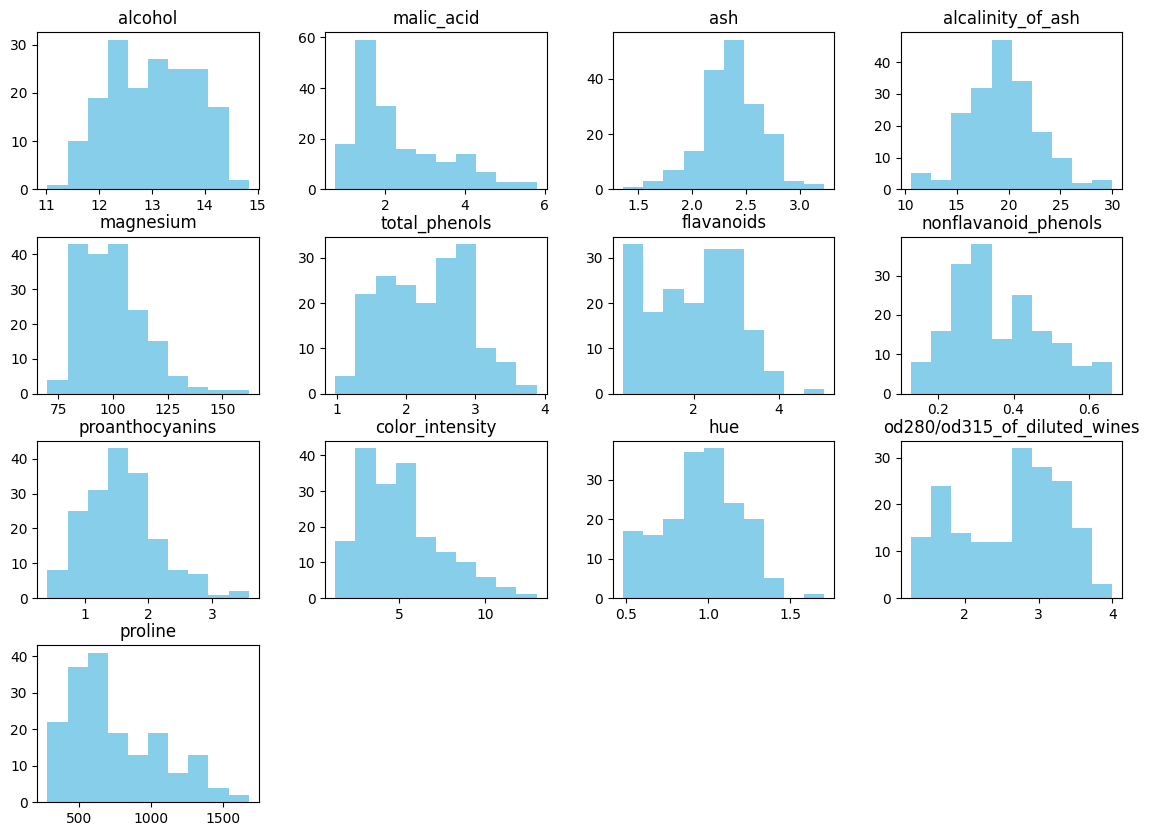

In [20]:
df.hist(figsize=(14, 10), color='skyblue', grid=False)
plt.show()

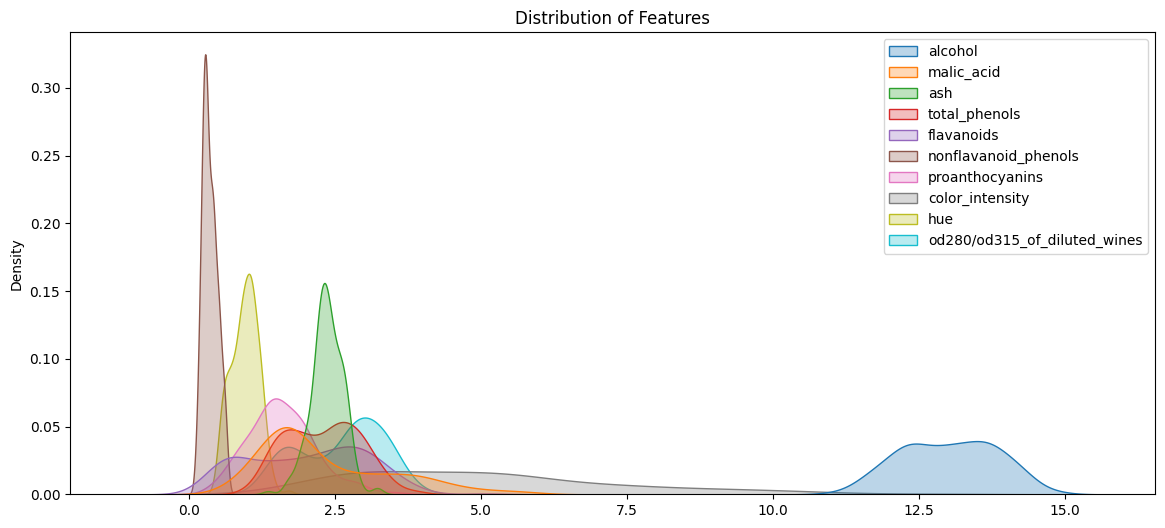

In [26]:
plt.figure(figsize=(14,6))
sns.kdeplot(df.drop(['proline', 'alcalinity_of_ash', 'magnesium'], axis=1), fill=True, alpha=0.3)
plt.title('Distribution of Features')
plt.show()

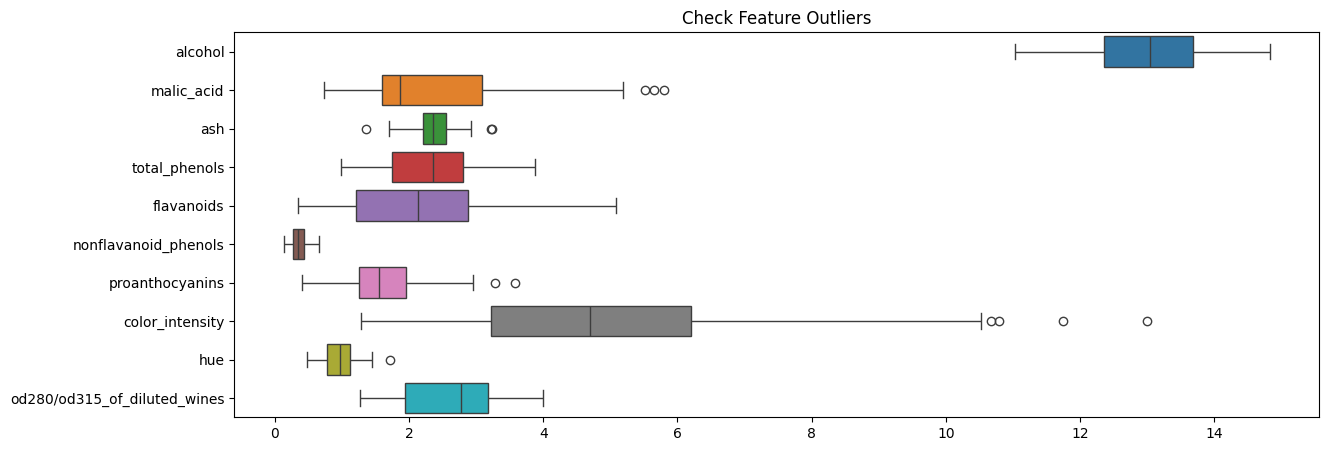

In [31]:
## Checking for putliers
plt.figure(figsize=(14, 5))
sns.boxplot(df.drop(['proline', 'magnesium', 'alcalinity_of_ash'], axis=1), orient='h')
plt.title('Check Feature Outliers')
plt.show()

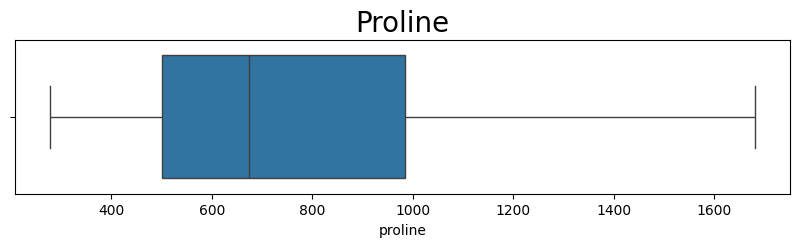

In [35]:
## Checking for putliers
plt.figure(figsize=(10, 2))
sns.boxplot(df['proline'], orient='h')
plt.title('Proline', fontsize=20)
plt.show()

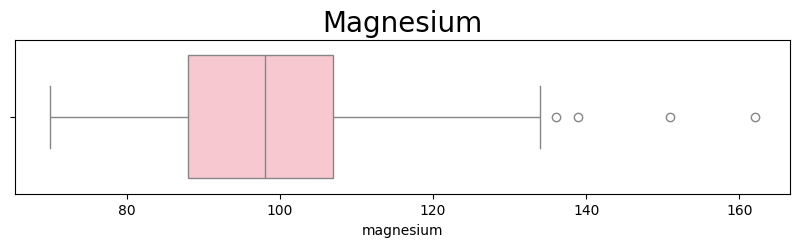

In [37]:
## Checking for putliers
plt.figure(figsize=(10, 2))
sns.boxplot(df['magnesium'], orient='h', color='pink')
plt.title('Magnesium', fontsize=20)
plt.show()

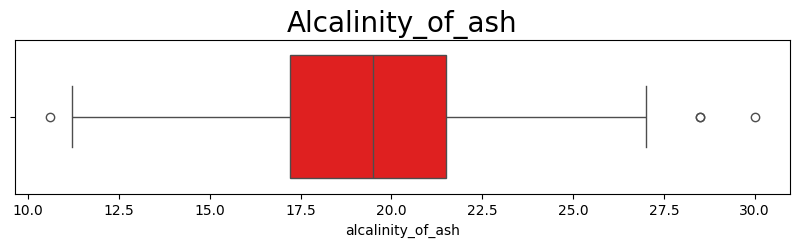

In [38]:
## Checking for putliers
plt.figure(figsize=(10, 2))
sns.boxplot(df['alcalinity_of_ash'], orient='h', color='red')
plt.title('Alcalinity_of_ash', fontsize=20)
plt.show()

#### Bivariate Analysis

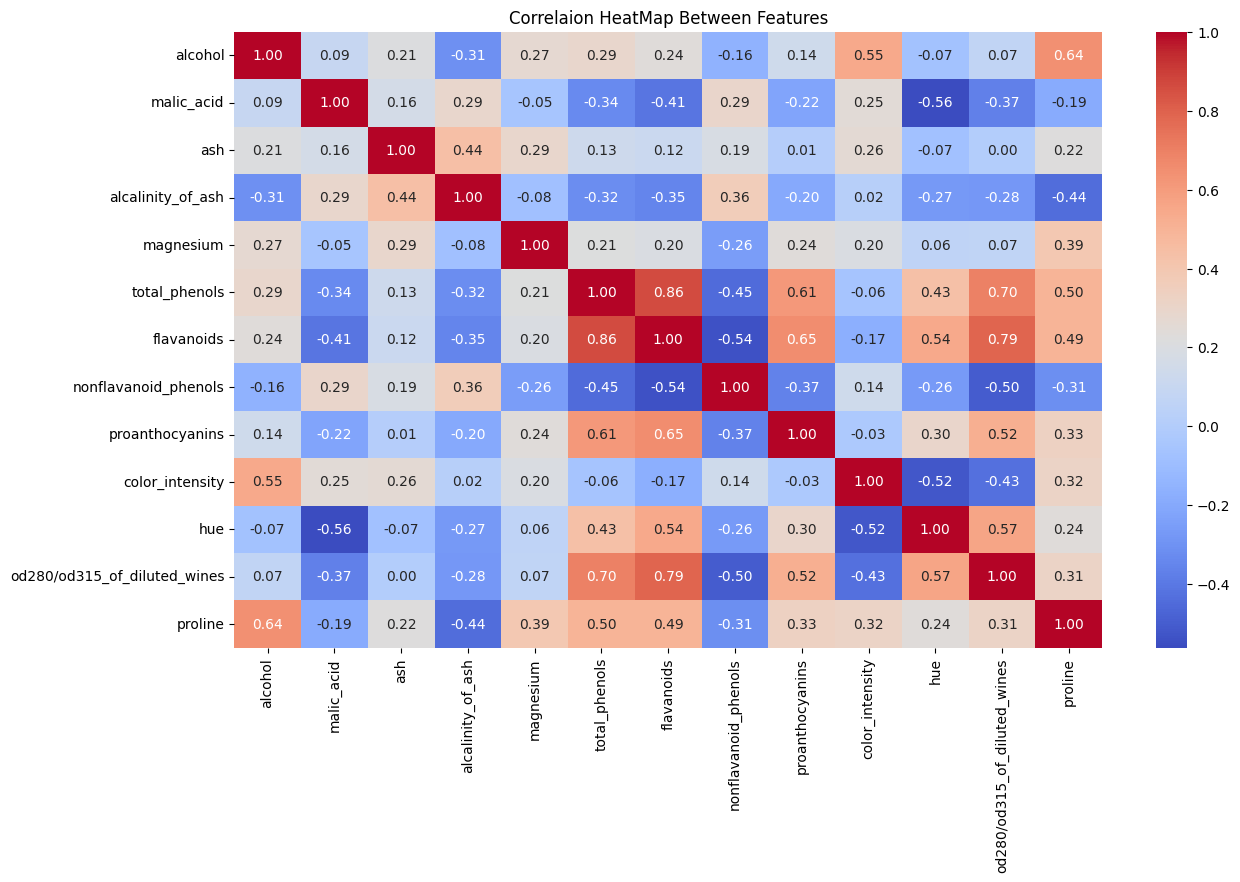

In [43]:
plt.figure(figsize=(14,8))
correlation_matrix=df.drop('Grade', axis=1).corr()

sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlaion HeatMap Between Features')
plt.show()

In [46]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'Grade'],
      dtype='object')

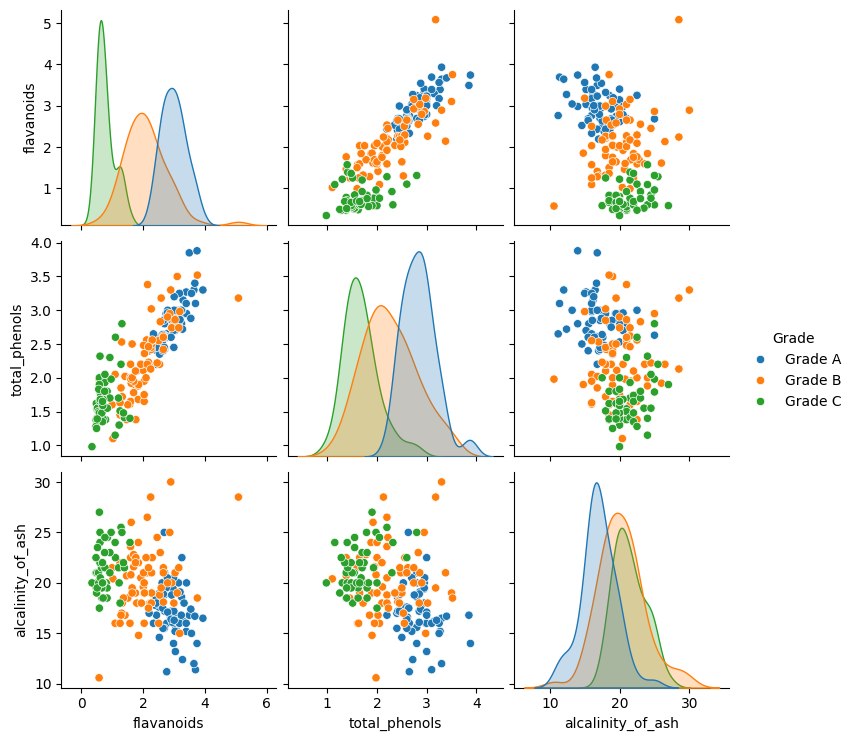

In [48]:
taste_df=df[['flavanoids', 'total_phenols', 'alcalinity_of_ash', 'Grade']]
sns.pairplot(taste_df, hue='Grade')

#### Multivariate Analysis

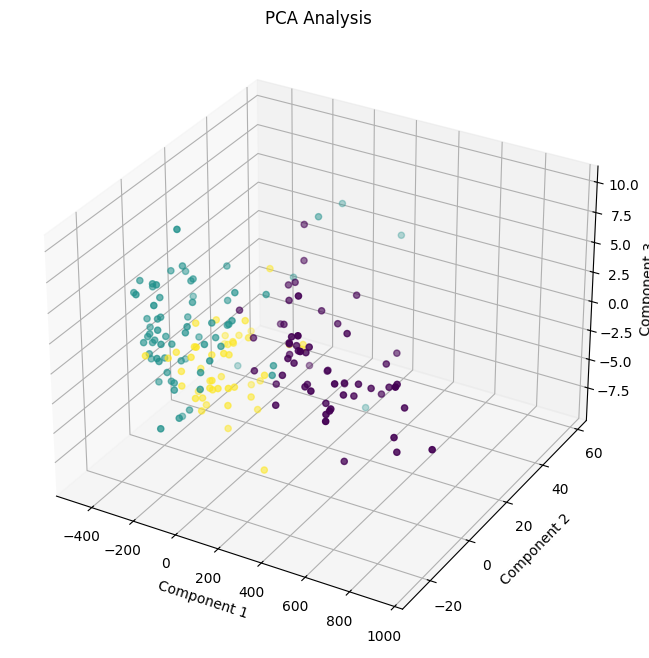

In [51]:
X= wine_data['data']
y= wine_data['target']

pca=PCA(n_components=3)
pca_wine=pca.fit_transform(X)

fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(111, projection='3d')

ax.scatter(pca_wine[:, 0], pca_wine[:, 1], pca_wine[:, 2], c=y, cmap='viridis')

ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")

plt.title('PCA Analysis')
plt.show()

In [52]:
pca.components_

array([[ 1.65926472e-03, -6.81015556e-04,  1.94905742e-04,
        -4.67130058e-03,  1.78680075e-02,  9.89829680e-04,
         1.56728830e-03, -1.23086662e-04,  6.00607792e-04,
         2.32714319e-03,  1.71380037e-04,  7.04931645e-04,
         9.99822937e-01],
       [ 1.20340617e-03,  2.15498184e-03,  4.59369254e-03,
         2.64503930e-02,  9.99344186e-01,  8.77962152e-04,
        -5.18507284e-05, -1.35447892e-03,  5.00440040e-03,
         1.51003530e-02, -7.62673115e-04, -3.49536431e-03,
        -1.77738095e-02],
       [-1.68738094e-02, -1.22003373e-01, -5.19874304e-02,
        -9.38593003e-01,  2.97802484e-02,  4.04846439e-02,
         8.54433387e-02, -1.35107797e-02,  2.46593824e-02,
        -2.91398464e-01,  2.59776624e-02,  7.03239693e-02,
        -4.52868159e-03]])

#### Data Preparation

In [56]:
# Check for Data Balancing

df['Grade'].value_counts().rename('Total Count').reset_index()

,Grade,Total Count
0,Grade B,71
1,Grade A,59
2,Grade C,48


In [ ]:
### imputation

X=df.drop('Grade', axis=1)
y=df['Grade']

In [ ]:
#Split the dataset to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
# Create a Preprocessor

preprocessor  = ColumnTransformer(transformers=[
    
])

#### Modelling & Evaluation

#### key Insights

1. There are no null values
2.